Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:

    Murder - Muder rates in different places of United States

    Assualt - Assualt rate in different places of United States

    UrbanPop - Urban population in different places of United States

    Rape - Rape rate in different places of United States

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

In [4]:
CrimeData = pd.read_csv("D:/1.0 Studies/DataScience_Excelr/Assignment9_Clustering/crime_data.csv")
CrimeData.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_CD = scaler.fit_transform(CrimeData.iloc[:,1:])

In [ ]:
# How to find optimum number of  clusters?
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion

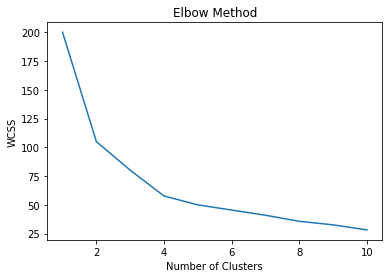

In [7]:
import warnings
warnings.filterwarnings("ignore")
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=25)
    kmeans.fit(scaled_CD)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The scree plot levels off at k=4 and let's use it to determine the clusters.

In [ ]:
# Applying K-means clustering
from sklearn.cluster import KMeans

Kmean_model=KMeans(n_clusters=4, random_state=25).fit(scaled_CD)
model_labels=pd.Series(Kmean_model.labels_)  # converting numpy array into pandas series object 

CrimeData['Cluster']= model_labels # creating a  new column and assigning it to new column 
CrimeData = CrimeData.iloc[:,:]

CrimeData.iloc[:,1:7].groupby(CrimeData.Cluster).mean()
CrimeData.sort_values(by=['Cluster'], inplace=True)

print(CrimeData.head())

In [15]:
CrimeData.groupby('cluster').agg(['mean']).reset_index()

,Cluster,Rape,Murder,Assault,UrbanPop
,,mean,mean,mean,mean
0,0,18.647059,5.576471,136.705882,73.176471
1,1,21.412500,13.937500,243.625000,53.750000
2,2,33.192308,10.815385,257.384615,76.000000
3,3,11.816667,3.541667,76.583333,51.250000


In [12]:
CrimeData.to_csv("crime_data_Kmean.csv")